In [44]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
from sklearn import datasets, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot
sns.set_style('whitegrid')

In [54]:
random_seed = 42
my_class = 'Adelie'
penguins = load_penguins()
penguins = penguins.drop(columns=['island', 'year'])
penguins_clean = penguins.dropna()
#penguins_clean['y'] = (penguins_clean.species == my_class).astype(float)
X = penguins_clean.drop(columns=["species"])
y = penguins_clean["species"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, random_state=random_seed)
print('Treinamento feture:\n', X_train, X_train.shape)  

Treinamento feture:
      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
232            49.1           14.5              212.0       4625.0  female
84             37.3           17.8              191.0       3350.0  female
306            40.9           16.6              187.0       3200.0  female
22             35.9           19.2              189.0       3800.0  female
29             40.5           18.9              180.0       3950.0    male
..              ...            ...                ...          ...     ...
195            49.6           15.0              216.0       4750.0    male
77             37.2           19.4              184.0       3900.0    male
112            39.7           17.7              193.0       3200.0  female
281            45.2           17.8              198.0       3950.0  female
108            38.1           17.0              181.0       3175.0  female

[266 rows x 5 columns] (266, 5)


In [56]:
scaler = StandardScaler()
X_train.drop(columns=["sex"], inplace=True)
X_test.drop(columns=["sex"], inplace=True)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_test, y_pred)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
accuracies_list = []
accuracies_list.append({'k': 5, 'fold': 0, 'stat' : 'train', 'accuracy': train_accuracy})
accuracies = pd.DataFrame.from_records(accuracies_list)

Acurácia: 0.746268656716418

Relatório de Classificação:
              precision    recall  f1-score   support

      Adelie       0.68      0.84      0.75        31
   Chinstrap       0.88      0.39      0.54        18
      Gentoo       0.81      0.94      0.87        18

    accuracy                           0.75        67
   macro avg       0.79      0.72      0.72        67
weighted avg       0.77      0.75      0.73        67



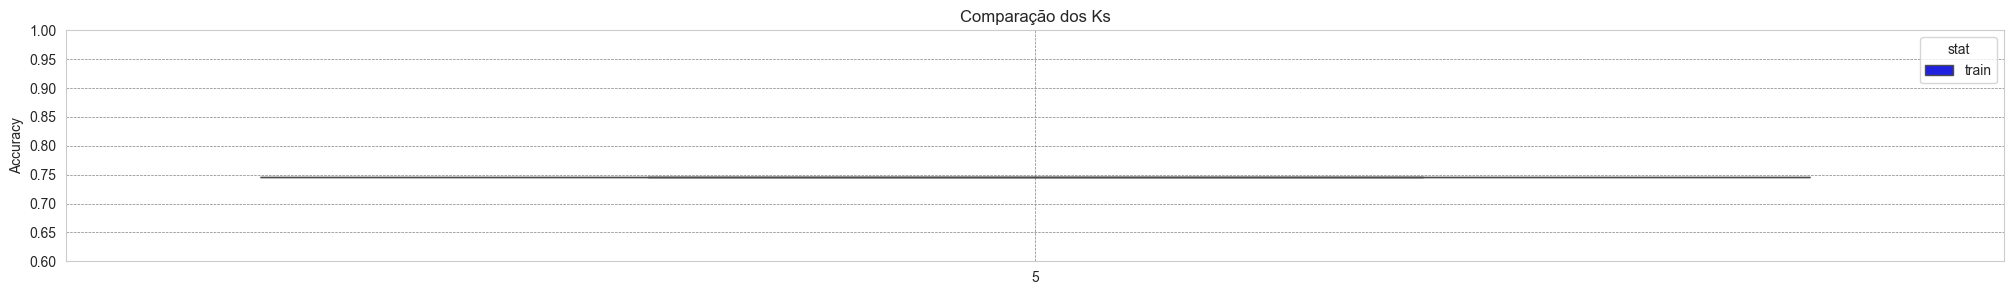

In [57]:
fig = pyplot.figure(figsize=(25, 3))
ax = fig.add_subplot(111)
_ = sns.boxplot(x='k', y='accuracy', data=accuracies, hue='stat', palette=['blue'], ax=ax, hue_order=['train'])
ax.set_title('Comparação dos Ks')
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
ax.set_ylim(0.6, 1.0)
ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

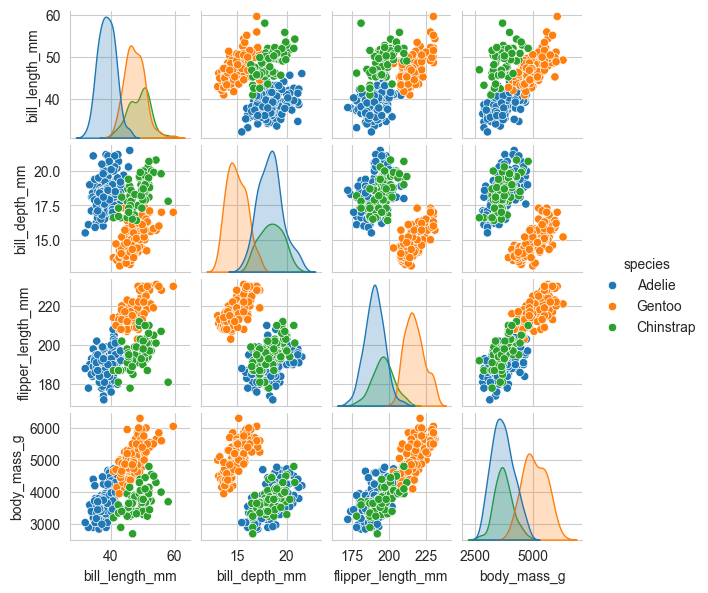

In [58]:
_ = sns.pairplot(penguins, hue='species', height=1.5)

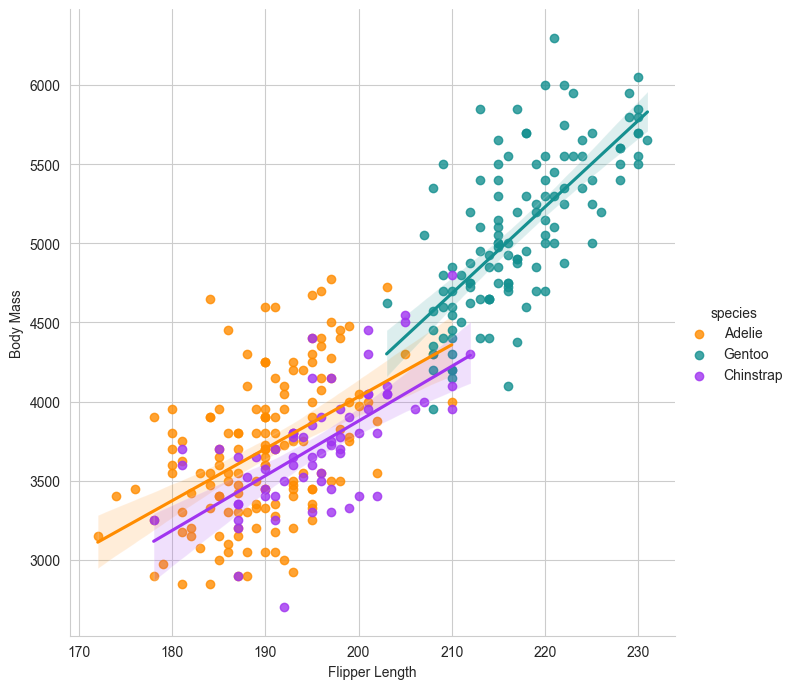

In [59]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')